In [1]:
!python --version

Python 3.7.3


## Import Statements

In [1]:
%matplotlib inline
from pydub import AudioSegment
from pydub.playback import play
import IPython.display as ipd
import os
import re
import shutil
import matplotlib.pyplot as plt

In [3]:
word_freq = {}
max_words = 0
min_words = 500
total_words = 0

csvfile = '/media/arif/Resource/Etc/data/LJSpeech-1.1/metadata.csv' # lab
csvfile = '/mnt/resource/Etc/data/LJSpeech-1.1/metadata.csv'        # home
with open(csvfile) as f:
    for i, line in enumerate(f):
        text = line.split('|')[2].strip()
        text = text.replace('.', ' ').replace(',', ' ').replace(';', ' ').replace('?', ' ').replace('!', ' ').replace('"', ' ')

        n = len(text.split())
        if n in word_freq: 
            word_freq[n] += 1
        else:
            word_freq[n] = 1
        max_words = max(max_words, n)
        min_words = min(min_words, n)
        total_words += n

        #if i == 50: break
print(f'Maximum words in a sentence: {max_words}')
print(f'Minimum words in a sentence: {min_words}')
print(f'Average words per sentence: {total_words / (i+1): .2f}')

Maximum words in a sentence: 39
Minimum words in a sentence: 1
Average words per sentence:  17.01


Text(0, 0.5, 'No. of samples')

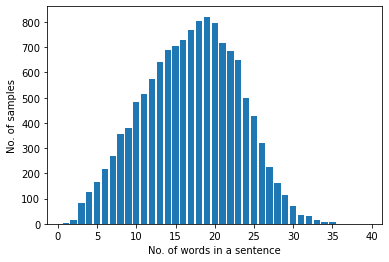

In [5]:
plt.bar(word_freq.keys(), word_freq.values())
plt.xlabel('No. of words in a sentence')
plt.ylabel('No. of samples')

In [10]:
ljwavdir = '/mnt/resource/Etc/data/LJSpeech-1.1/wavs'

files = os.listdir(ljwavdir)

wav_duration = {}
max_duration = 0
min_duration = 1000
total_duration = 0

for i, file in enumerate(files):
    audio = AudioSegment.from_wav(os.path.join(ljwavdir, file))

    duration = audio.duration_seconds

    max_duration = max(max_duration, duration)
    min_duration = min(min_duration, duration)
    total_duration += duration

    duration = int(duration)
    if duration in wav_duration:
        wav_duration[duration] += 1
    else:
        wav_duration[duration] = 1

    #if i == 5: break

avg_duration = total_duration / len(files)
total_duration /= 60 # sec. to min.
duration_hours = total_duration // 60
duration_mins = total_duration - (duration_hours * 60)

print(f"Total duration: {int(duration_hours)} hours {duration_mins:.2f} minutes")
print(f'Maximum duration: {max_duration:.2f} seconds')
print(f'Minimum duration: {min_duration:.2f} seconds')
print(f'Average duration: {avg_duration:.2f} seconds')

Total duration: 23 hours 55.28 minutes
Maximum duration: 10.10 seconds
Minimum duration: 1.11 seconds
Average duration: 6.57 seconds


## Creating LJ-mini corpus

* corpus will contain about 8 hours of speech
* word length: 3-30

In [2]:
wavdir = '/media/arif/Resource/Etc/data/LJSpeech-1.1/wavs'
wavdir = '/mnt/resource/Etc/data/LJSpeech-1.1/wavs'
destdir = '/media/arif/Resource/Etc/data/lj-mini/wavs'
destdir = '/mnt/resource/Etc/data/lj-mini/wavs'

with open('/mnt/resource/Etc/data/LJSpeech-1.1/metadata.csv') as f:
    with open('/mnt/resource/Etc/data/lj-mini/mini-metadata.csv', 'w') as outfile:
        duration = 0
        for i, line in enumerate(f):
            idx, txt, normtxt = line.split('|')

            normtxt = normtxt.replace('.', ' ').replace(',', ' ').replace(';', ' ').replace('?', ' ').replace('!', ' ').replace('"', ' ')
            nwords = len(normtxt.split())

            if nwords < 3 or nwords > 30:
                print(idx)
                continue

            outfile.write(line)
            
            wavpath = os.path.join(wavdir, idx+'.wav')
            shutil.copy(wavpath, destdir)

            audio = AudioSegment.from_wav(wavpath)
            duration += audio.duration_seconds
            if duration >= 28800: # 8 hours
                break

            #if i == 5: break

LJ001-0014
LJ001-0152
LJ003-0011
LJ005-0223
LJ007-0060
LJ007-0229
LJ008-0263
LJ009-0053
LJ009-0129
LJ011-0101
LJ011-0154
LJ012-0116
LJ012-0147
LJ014-0079
LJ014-0133


In [13]:
ljwavdir = '/media/arif/Resource/Etc/data/lj-mini/wavs'

files = os.listdir(ljwavdir)

wav_duration = {}
max_duration = 0
min_duration = 1000
total_duration = 0

for i, file in enumerate(files):
    audio = AudioSegment.from_wav(os.path.join(ljwavdir, file))

    duration = audio.duration_seconds

    max_duration = max(max_duration, duration)
    min_duration = min(min_duration, duration)
    total_duration += duration

    duration = int(duration)
    if duration in wav_duration:
        wav_duration[duration] += 1
    else:
        wav_duration[duration] = 1

    #if i == 5: break

avg_duration = total_duration / len(files)
total_duration /= 60 # sec. to min.
duration_hours = total_duration // 60
duration_mins = total_duration - (duration_hours * 60)

print("LJ-mini corpus info:")
print(f"Total duration: {int(duration_hours)} hours {duration_mins:.2f} minutes")
print(f'Maximum duration: {max_duration:.2f} seconds')
print(f'Minimum duration: {min_duration:.2f} seconds')
print(f'Average duration: {avg_duration:.2f} seconds')

LJ-mini corpus info:
Total duration: 8 hours 0.00 minutes
Maximum duration: 10.10 seconds
Minimum duration: 1.12 seconds
Average duration: 6.61 seconds
